<a href="https://colab.research.google.com/github/G-Navyasree/loanstatus_and_salesforecasting/blob/development%2Floan_status/final_load_prediction_83_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the Python Essential Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import sklearn as sk

**Load the train dataset**

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(614, 13)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
dataset.describe()
#count is the number of non empty values

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#predicting how credit history affects the loan_status of the applicant
pd.crosstab(dataset['Credit_History'],dataset['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


People with credit_history as 1 has more chances of getting loan 

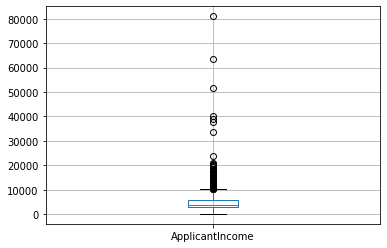

In [8]:
dataset.boxplot(column='ApplicantIncome')

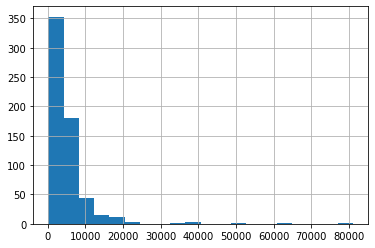

In [9]:
dataset['ApplicantIncome'].hist(bins=20)

This is a right skewed histogram ,we need to normalize the values.

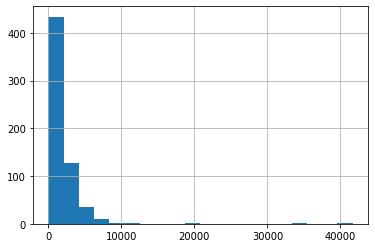

In [10]:
dataset['CoapplicantIncome'].hist(bins=20)

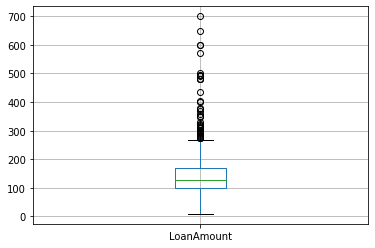

In [11]:
dataset.boxplot(column='LoanAmount')

These boxplots shows the outliers 

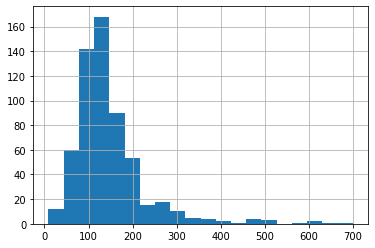

In [12]:
dataset['LoanAmount'].hist(bins=20)

The loanamount variable is little bit right skewed.we can normalize it using lock function.

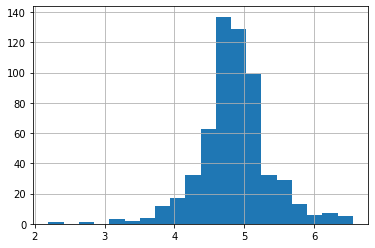

In [13]:
dataset['LoanAmount_log']=np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)

The data of loan_amount is normalized

In [14]:
#finding the No. of missing values in each of the independent variables
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

**Imputing the missing values of independent variables in traindataset**

In [15]:

dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)

In [16]:
dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.median())
dataset.LoanAmount_log=dataset.LoanAmount_log.fillna(dataset.LoanAmount_log.median())
dataset["Loan_Amount_Term"]=dataset["Loan_Amount_Term"].fillna(dataset["Loan_Amount_Term"].mean())

In [17]:
#Normalising the total income
dataset['TotalIncome']=dataset['ApplicantIncome']+dataset['CoapplicantIncome']
dataset['TotalIncome_Log']=np.log(dataset['TotalIncome'])

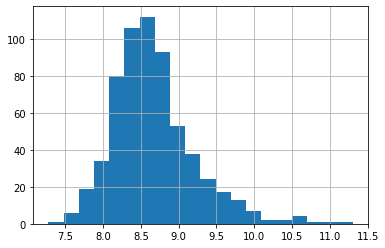

In [18]:
dataset['TotalIncome_Log'].hist(bins=20)

In [19]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


**Univariate Analysis using countplot**

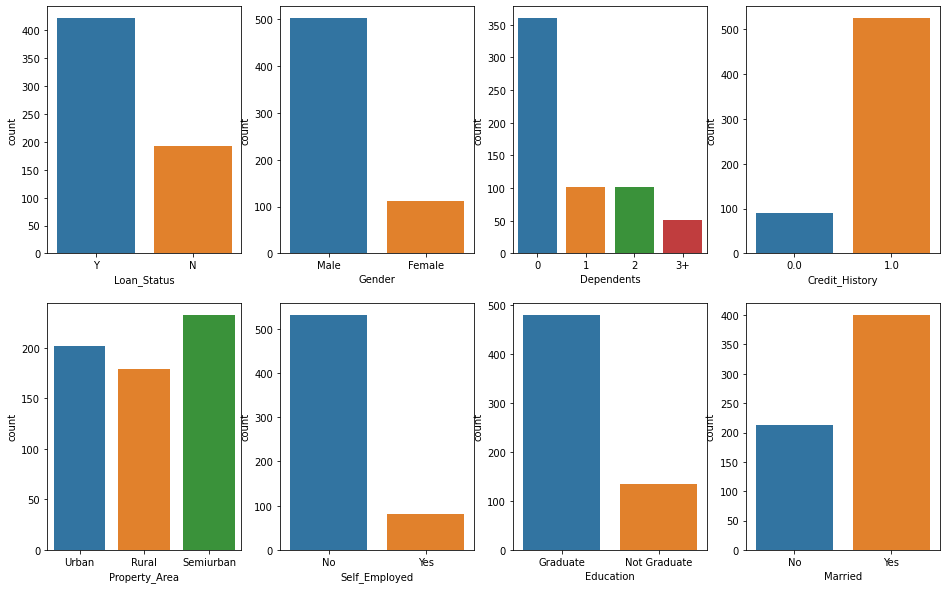

In [22]:
fig,ax=plt.subplots(2,4,figsize=(16,10))
sns.countplot(data=dataset,x='Loan_Status',ax=ax[0][0])
sns.countplot(x='Gender',data=dataset,ax=ax[0][1])
sns.countplot(x='Dependents',data=dataset,ax=ax[0][2])
sns.countplot(x='Credit_History',data=dataset,ax=ax[0][3])
sns.countplot(x='Property_Area',data=dataset,ax=ax[1][0])
sns.countplot(x='Self_Employed',data=dataset,ax=ax[1][1])
sns.countplot(x='Education',data=dataset,ax=ax[1][2])
sns.countplot(x='Married',data=dataset,ax=ax[1][3])

**Bivariate Analysis**

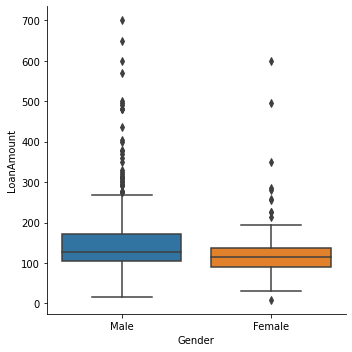

In [23]:
sns.catplot(x='Gender',y='LoanAmount',data=dataset,kind='box')

The mean value of Loan Amount applied by males is slightly higher than Females.

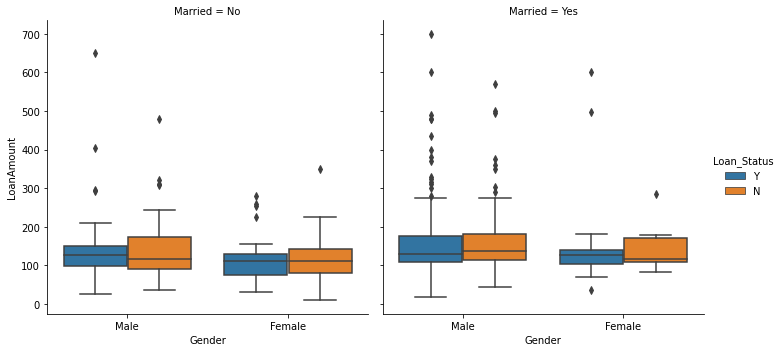

In [24]:
sns.catplot(x='Gender',y='LoanAmount',data=dataset,kind='box',hue='Loan_Status',col='Married')

If you are married then the loan amount requested is slightly higher than non-married

<function matplotlib.pyplot.show>

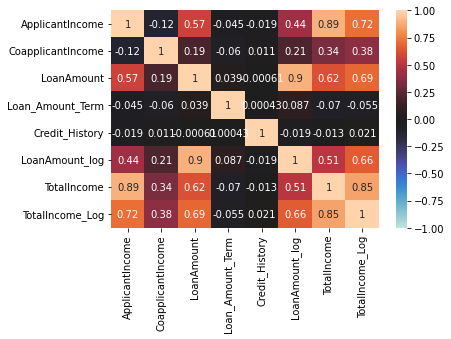

In [25]:
corr_matrix=dataset.corr()
sns.heatmap(corr_matrix,vmin=-1,vmax=1,center=0,annot=True)
plt.show

In [26]:
dataset["Dependents"]=dataset["Dependents"].map({"0":0,"1":1,"2":2,"3+":3})
dataset["Loan_Status"]=dataset["Loan_Status"].map({"Y":1,"N":0})
print(dataset)

      Loan_ID  Gender Married  Dependents     Education Self_Employed  \
0    LP001002    Male      No           0      Graduate            No   
1    LP001003    Male     Yes           1      Graduate            No   
2    LP001005    Male     Yes           0      Graduate           Yes   
3    LP001006    Male     Yes           0  Not Graduate            No   
4    LP001008    Male      No           0      Graduate            No   
..        ...     ...     ...         ...           ...           ...   
609  LP002978  Female      No           0      Graduate            No   
610  LP002979    Male     Yes           3      Graduate            No   
611  LP002983    Male     Yes           1      Graduate            No   
612  LP002984    Male     Yes           2      Graduate            No   
613  LP002990  Female      No           0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.

In [27]:
dataset_dum=pd.get_dummies(dataset,columns=["Gender","Married","Education","Self_Employed","Property_Area"])
dataset_new=dataset_dum
print(dataset_new.head())
#print(type(y))

    Loan_ID  Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0  LP001002           0             5849                0.0       128.0   
1  LP001003           1             4583             1508.0       128.0   
2  LP001005           0             3000                0.0        66.0   
3  LP001006           0             2583             2358.0       120.0   
4  LP001008           0             6000                0.0       141.0   

   Loan_Amount_Term  Credit_History  Loan_Status  LoanAmount_log  TotalIncome  \
0             360.0             1.0            1        4.852030       5849.0   
1             360.0             1.0            0        4.852030       6091.0   
2             360.0             1.0            1        4.189655       3000.0   
3             360.0             1.0            1        4.787492       4941.0   
4             360.0             1.0            1        4.948760       6000.0   

   ...  Gender_Male  Married_No  Married_Yes  Education_Gradua

**Dividing the dataset into dependent and independent variables**

In [28]:
x=dataset_new.drop(columns=["Loan_ID","Loan_Status","ApplicantIncome","CoapplicantIncome","LoanAmount",'TotalIncome',],axis=1)

y=dataset_new["Loan_Status"]

print(type(x))
print(type(y))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


**Split the train data into test and train**

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train)

     Dependents  Loan_Amount_Term  Credit_History  LoanAmount_log  \
351           0             360.0             1.0        5.730100   
593           0             180.0             1.0        4.955827   
320           0             360.0             1.0        4.744932   
186           1             300.0             0.0        4.189655   
557           3             360.0             1.0        5.560682   
..          ...               ...             ...             ...   
277           0             360.0             1.0        4.382027   
9             1             360.0             1.0        5.855072   
359           3             360.0             1.0        5.298317   
192           0             360.0             1.0        5.075174   
559           0             360.0             1.0        5.204007   

     TotalIncome_Log  Gender_Female  Gender_Male  Married_No  Married_Yes  \
351         9.466300              0            1           1            0   
593         8.876

In [30]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(x_train,y_train)
#xgb_model.score(x_test,y_test)
xgb_predict=xgb_model.predict(x_test)
from sklearn import metrics
ac=metrics.accuracy_score(xgb_predict,y_test)
print(ac*100)

83.24324324324324


**Modifying the Test data to train data format**

In [31]:
testdata=pd.read_csv('test.csv')
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [32]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [33]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

**Imputing the missing values of testdataset**

In [34]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0],inplace=True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0],inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0],inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0],inplace=True)

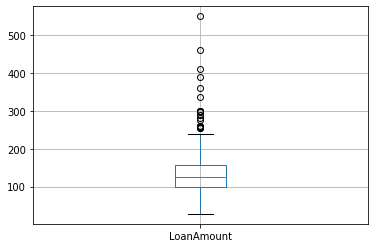

In [35]:
testdata.boxplot(column='LoanAmount')

In [36]:
testdata.LoanAmount=testdata.LoanAmount.fillna(testdata.LoanAmount.median())
testdata["Loan_Amount_Term"]=testdata["Loan_Amount_Term"].fillna(dataset["Loan_Amount_Term"].mean())

In [37]:
testdata['LoanAmount_log']=np.log(testdata['LoanAmount'])
testdata['TotalIncome']=testdata['ApplicantIncome']+testdata['CoapplicantIncome']
testdata['TotalIncome_Log']=np.log(testdata['TotalIncome'])

In [38]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
TotalIncome          0
TotalIncome_Log      0
dtype: int64

In [39]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_Log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [40]:
testdata=testdata.drop(columns=["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount","TotalIncome"],axis=1)



In [41]:
testdata["Dependents"]=testdata["Dependents"].map({"0":0,"1":1,"2":2,"3+":3})



In [42]:
test_dum=pd.get_dummies(testdata,columns=["Gender","Married","Education","Self_Employed","Property_Area"])
test_new=test_dum

In [43]:
test_new.head()

,Dependents,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome_Log,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,360.0,1.0,4.700480,8.651724,0,1,0,1,1,0,1,0,0,0,1
1,1,360.0,1.0,4.836282,8.428581,0,1,0,1,1,0,1,0,0,0,1
2,2,360.0,1.0,5.337538,8.824678,0,1,0,1,1,0,1,0,0,0,1
3,2,360.0,1.0,4.605170,8.494129,0,1,0,1,1,0,1,0,0,0,1
4,0,360.0,1.0,4.356709,8.094378,0,1,1,0,0,1,1,0,0,0,1


**Predicting on Test Data**

In [44]:
pred=xgb_model.predict(test_new)
pred=pd.DataFrame(pred)
pred=pred.rename(columns={0:"LoanStatus"})
pred['LoanStatus']=pred['LoanStatus'].map({1:"Y",0:"N"})
pred

,LoanStatus
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,Y
363,Y
364,Y
365,Y


**The accuracy score of this XGBOOST model for loan prediction is 83.2%**